<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.907515,79.560337,22.334295,-1.672408e-07,208.802146,208.802145,1.477237e-06
1,0.0,1.0,88.761685,77.724387,22.818762,-7.544409e-08,199.304834,199.304833,1.430797e-06
2,0.0,2.0,94.690134,46.207303,76.827565,-3.762172e-07,227.725002,227.725002,-3.300467e-07
3,0.0,3.0,70.725725,30.924983,62.542186,6.257672e-06,174.192900,174.192894,6.355747e-06
4,0.0,4.0,87.677530,45.596704,89.559243,4.443920e-07,232.833477,232.833477,1.473751e-08
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,30.690907,92.061811,85.634925,6.817320e-09,218.387644,218.387643,3.506672e-07
59996,999.0,56.0,29.217530,50.367291,97.809943,4.715864e-07,187.394764,187.394763,1.526948e-06
59997,999.0,57.0,54.242469,72.377485,70.498160,-6.112554e-08,207.118115,207.118114,1.989800e-07
59998,999.0,58.0,29.041558,56.012922,43.123859,1.954360e-07,138.178340,138.178340,-8.028621e-08


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.907515,79.560337,22.334295,-1.672408e-07,208.802146,208.802145,1.477237e-06
1,0.0,1.0,88.761685,77.724387,22.818762,-7.544409e-08,199.304834,199.304833,1.430797e-06
2,0.0,2.0,94.690134,46.207303,76.827565,-3.762172e-07,227.725002,227.725002,-3.300467e-07
3,0.0,3.0,70.725725,30.924983,62.542186,6.257672e-06,174.192900,174.192894,6.355747e-06
4,0.0,4.0,87.677530,45.596704,89.559243,4.443920e-07,232.833477,232.833477,1.473751e-08
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,30.690907,92.061811,85.634925,6.817320e-09,218.387644,218.387643,3.506672e-07
59996,999.0,56.0,29.217530,50.367291,97.809943,4.715864e-07,187.394764,187.394763,1.526948e-06
59997,999.0,57.0,54.242469,72.377485,70.498160,-6.112554e-08,207.118115,207.118114,1.989800e-07
59998,999.0,58.0,29.041558,56.012922,43.123859,1.954360e-07,138.178340,138.178340,-8.028621e-08


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    96.907515  79.560337  ...  208.802145  1.477237e-06
      1.0    88.761685  77.724387  ...  199.304833  1.430797e-06
      2.0    94.690134  46.207303  ...  227.725002 -3.300467e-07
      3.0    70.725725  30.924983  ...  174.192894  6.355747e-06
      4.0    87.677530  45.596704  ...  232.833477  1.473751e-08
...                ...        ...  ...         ...           ...
999.0 55.0   30.690907  92.061811  ...  218.387643  3.506672e-07
      56.0   29.217530  50.367291  ...  187.394763  1.526948e-06
      57.0   54.242469  72.377485  ...  207.118114  1.989800e-07
      58.0   29.041558  56.012922  ...  138.178340 -8.028621e-08
      59.0   98.030300  99.282535  ...  247.491193 -5.355106e-07

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    96.907515  79.560337  ...  208.802145  1.477237e-06
      1.0    88.761685  77.724387  ...  199.304833  1.430797e-06
      2.0    94.690134  46.207303  ...  227.725002 -3.300467e-07
      3.0    70.725725  30.924983  ...  174.192894  6.355747e-06
      4.0    87.677530  45.596704  ...  232.833477  1.473751e-08
...                ...        ...  ...         ...           ...
999.0 55.0   30.690907  92.061811  ...  218.387643  3.506672e-07
      56.0   29.217530  50.367291  ...  187.394763  1.526948e-06
      57.0   54.242469  72.377485  ...  207.118114  1.989800e-07
      58.0   29.041558  56.012922  ...  138.178340 -8.028621e-08
      59.0   98.030300  99.282535  ...  247.491193 -5.355106e-07

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.907515,79.560337,22.334295,-1.672408e-07,208.802146,208.802145,1.477237e-06
1,0.0,1.0,88.761685,77.724387,22.818762,-7.544409e-08,199.304834,199.304833,1.430797e-06
2,0.0,2.0,94.690134,46.207303,76.827565,-3.762172e-07,227.725002,227.725002,-3.300467e-07
3,0.0,3.0,70.725725,30.924983,62.542186,6.257672e-06,174.192900,174.192894,6.355747e-06
4,0.0,4.0,87.677530,45.596704,89.559243,4.443920e-07,232.833477,232.833477,1.473751e-08
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,30.690907,92.061811,85.634925,6.817320e-09,218.387644,218.387643,3.506672e-07
59996,999.0,56.0,29.217530,50.367291,97.809943,4.715864e-07,187.394764,187.394763,1.526948e-06
59997,999.0,57.0,54.242469,72.377485,70.498160,-6.112554e-08,207.118115,207.118114,1.989800e-07
59998,999.0,58.0,29.041558,56.012922,43.123859,1.954360e-07,138.178340,138.178340,-8.028621e-08


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    96.907515  79.560337  ...  208.802145  1.477237e-06
      1.0    88.761685  77.724387  ...  199.304833  1.430797e-06
      2.0    94.690134  46.207303  ...  227.725002 -3.300467e-07
      3.0    70.725725  30.924983  ...  174.192894  6.355747e-06
      4.0    87.677530  45.596704  ...  232.833477  1.473751e-08
...                ...        ...  ...         ...           ...
999.0 55.0   30.690907  92.061811  ...  218.387643  3.506672e-07
      56.0   29.217530  50.367291  ...  187.394763  1.526948e-06
      57.0   54.242469  72.377485  ...  207.118114  1.989800e-07
      58.0   29.041558  56.012922  ...  138.178340 -8.028621e-08
      59.0   98.030300  99.282535  ...  247.491193 -5.355106e-07

[60000 rows x 7 columns]

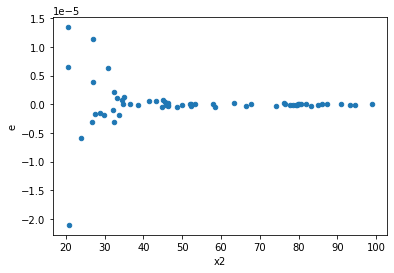

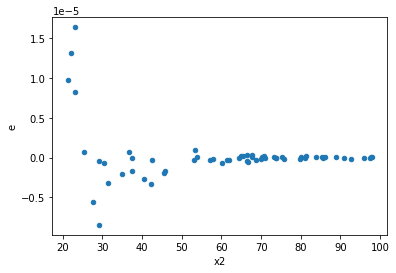

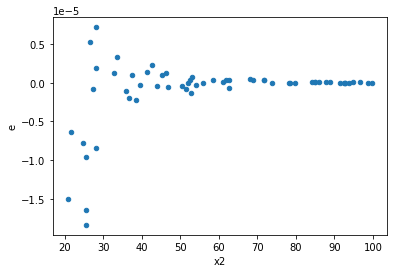

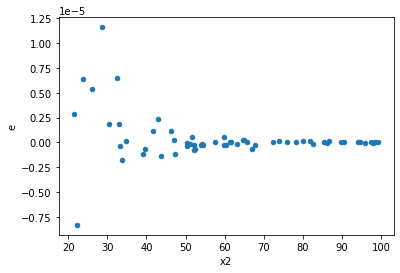

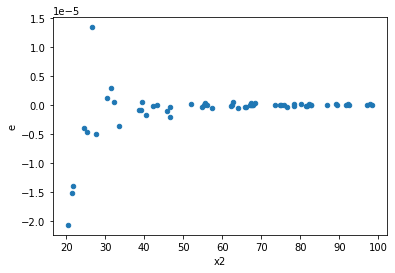

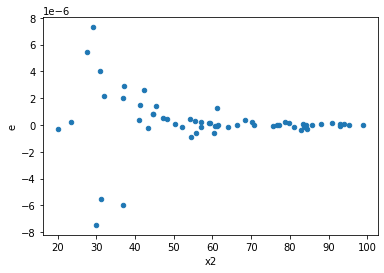

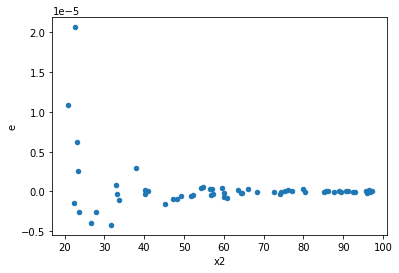

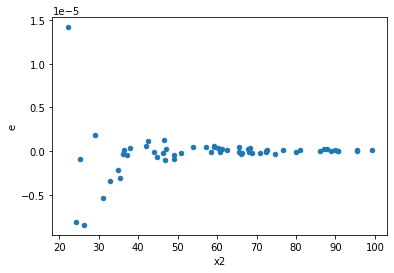

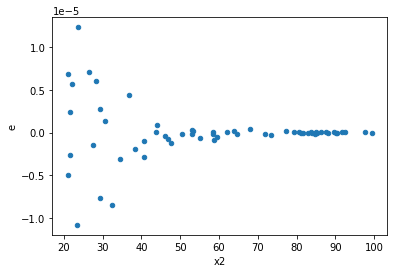

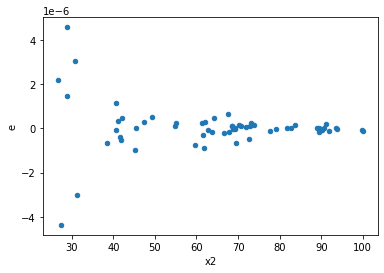

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,4.639957003755404e-13,8.088782491786331e-10,2.319978501877702e-14,4.044391245893166e-11,0.000573628603373499,3.2971618803018665e-29,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,2.6802332476954357e-13,5.356180215403323e-10,1.3401166238477178e-14,2.6780901077016616e-11,0.0005004001246984951,7.86971696701947e-30,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,2.3217688450751313e-13,7.092641333630356e-10,1.1608844225375657e-14,3.546320666815178e-11,0.0003273489714002975,9.166045223739455e-32,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,7.302494959913718e-13,2.781620479702191e-10,3.651247479956859e-14,1.3908102398510956e-11,0.002625266463631856,2.7338980838380237e-22,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,3.0807858182910703e-13,7.588555449391303e-10,1.540392909145535e-14,3.794277724695651e-11,0.0004059779017017248,8.773792220440592e-31,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,4.954902283392791e-13,2.3985701743991317e-10,2.4774511416963955e-14,1.1992850871995658e-11,0.0020657733245741075,2.2308842996913047e-23,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,3.115516684304928e-13,5.053192938187261e-10,1.557758342152464e-14,2.5265964690936308e-11,0.0006165441775952773,7.027224918774434e-29,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,5.848261655023553e-13,3.4820039648257763e-10,2.9241308275117766e-14,1.741001982412888e-11,0.0016795677759419707,2.5579540622679048e-24,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,4.2531179835118686e-13,6.190691980753515e-10,2.1265589917559343e-14,3.095345990376757e-11,0.0006870181874230788,2.186451092794386e-28,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64